Dimensions de l'entrée (X) : (1000, 2)
Dimensions de la sortie (y) : (1000,)


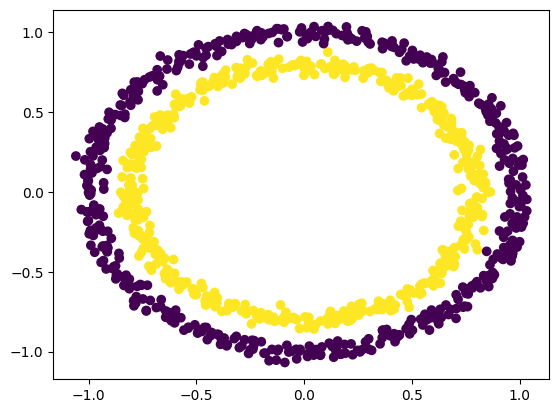

Dimensions de X_train : (800, 2)
Dimensions de X_test : (200, 2)
Dimensions de y_train : (800,)
Dimensions de y_test : (200,)


In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Créer des données avec make circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

# Afficher les dimensions du dataset
print("Dimensions de l'entrée (X) :", X.shape)
print("Dimensions de la sortie (y) :", y.shape)

# Visualiser les données
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()


# Justification : Ce dataset nécessite une fonction non linéaire pour séparer ses classes.
# Comme les données sont générées en cercles et qu'elles sont mélangées avec un peu de bruit, une fonction non linéaire est nécessaire pour séparer les classes.

# Diviser les données en ensembles d’apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer un nouveau modèle Sequential
model = Sequential()

# Ajouter une couche entièrement connectée avec 5 neurones cachés
model.add(Dense(5, activation='sigmoid',input_shape=(2,)))

# Ajouter une couche de sortie avec un neurone
model.add(Dense(1, activation='sigmoid'))

# Afficher un résumé concis de l'architecture du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [ ]:
# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Affichage de la progression toutes les 10 époques
for i in range(0, 100, 10):
    print("Epoch:", i+1)
    print("Train Loss:", history.history['loss'][i])
    print("Train Accuracy:", history.history['accuracy'][i])
    print("Test Loss:", history.history['val_loss'][i])
    print("Test Accuracy:", history.history['val_accuracy'][i])
    print("------------------------------------")

Epoch: 1
Train Loss: 0.6928935050964355
Train Accuracy: 0.5099999904632568
Test Loss: 0.6943161487579346
Test Accuracy: 0.4699999988079071
------------------------------------
Epoch: 11
Train Loss: 0.6928910613059998
Train Accuracy: 0.512499988079071
Test Loss: 0.6943138241767883
Test Accuracy: 0.46000000834465027
------------------------------------
Epoch: 21
Train Loss: 0.6928860545158386
Train Accuracy: 0.5112500190734863
Test Loss: 0.694315493106842
Test Accuracy: 0.4650000035762787
------------------------------------
Epoch: 31
Train Loss: 0.692891538143158
Train Accuracy: 0.518750011920929
Test Loss: 0.6943133473396301
Test Accuracy: 0.46000000834465027
------------------------------------
Epoch: 41
Train Loss: 0.6928831338882446
Train Accuracy: 0.5149999856948853
Test Loss: 0.6943138241767883
Test Accuracy: 0.46000000834465027
------------------------------------
Epoch: 51
Train Loss: 0.6928839683532715
Train Accuracy: 0.5199999809265137
Test Loss: 0.6943132877349854
Test Accura

1661/1661 [==============================] - 3s 1ms/step


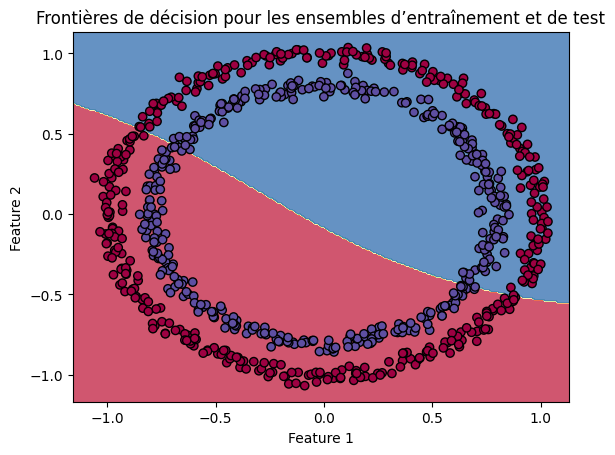

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définir la grille pour la visualisation
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prédire les étiquettes pour chaque point dans la grille
# Prédire les probabilités pour chaque point dans la grille
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convertir les probabilités en classes (0 ou 1)
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)


# Tracer les frontières de décision
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# Tracer les points d'entraînement
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontières de décision pour les ensembles d’entraînement et de test')
plt.show()

In [ ]:

model = Sequential()

model.add(Dense(50, input_shape=(2,), activation='relu'))
model.add(Dense(50, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

for i in range(0, 100, 10):
    print("Epoch:", i+1)
    print("Train Loss:", history.history['loss'][i])
    print("Train Accuracy:", history.history['accuracy'][i])
    print("Test Loss:", history.history['val_loss'][i])
    print("Test Accuracy:", history.history['val_accuracy'][i])
    print("------------------------------------")

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.6945 - accuracy: 0.4850 - val_loss: 0.6868 - val_accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.4950 - val_loss: 0.6852 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.5000 - val_loss: 0.6833 - val_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6770 - accuracy: 0.5000 - val_loss: 0.6797 - val_accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.5525 - val_loss: 0.6749 - val_accuracy: 0.5400
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6646 - accuracy: 0.6000 - val_loss: 0.6677 - val_accuracy: 0.5650
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6557 - accuracy: 0.5863 - val_loss: 0.6601 - val_accuracy: 0.5700
Epoch 8/100


1661/1661 [==============================] - 4s 2ms/step


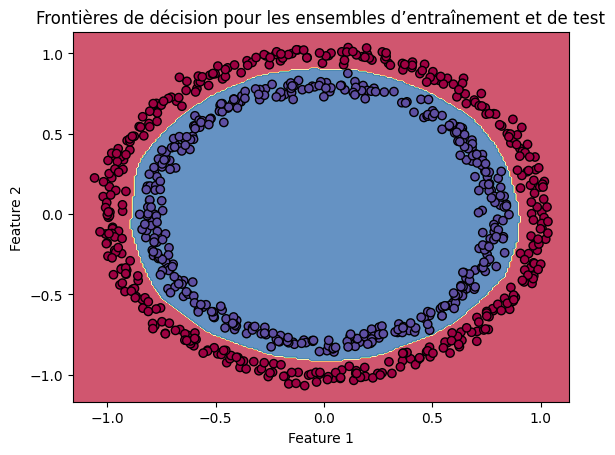

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define grid for show
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#predict the prob for each point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#convert the prob (0 or 1)
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Frontières de décision pour les ensembles d’entraînement et de test')
plt.show()

In [ ]:
#Exercice 2
from sklearn.datasets import make_blobs

#create the data
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

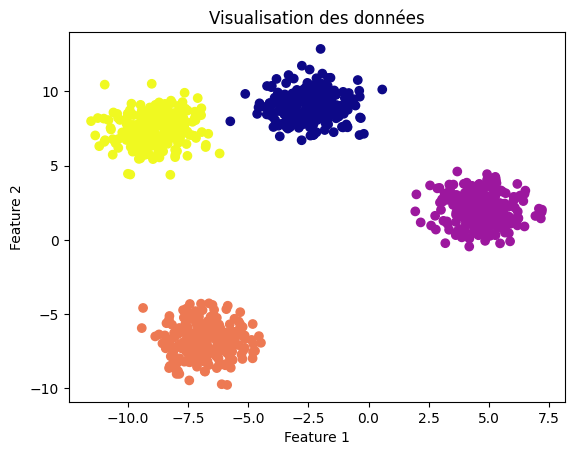

In [ ]:
import matplotlib.pyplot as plt

# show the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualisation des données')
plt.show()

In [ ]:
#need non linear function to separate the data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

for i in range(0, 100, 9):
    print("Epoch:", i+1)
    print("Train Loss:", history.history['loss'][i])
    print("Train Accuracy:", history.history['accuracy'][i])
    print("Test Loss:", history.history['val_loss'][i])
    print("Test Accuracy:", history.history['val_accuracy'][i])
    print("------------------------------------")

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 2.0055 - accuracy: 0.5075 - val_loss: 1.4220 - val_accuracy: 0.4700
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9632 - accuracy: 0.6025 - val_loss: 0.6618 - val_accuracy: 0.7500
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.7450 - val_loss: 0.4345 - val_accuracy: 0.7550
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.9575 - val_loss: 0.3052 - val_accuracy: 1.0000
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9975 - val_loss: 0.2277 - val_accuracy: 1.0000
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9975 - val_loss: 0.1762 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.9975 - val_loss: 0.1382 - val_accuracy: 1.0000
Epoch 8/100


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)

precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

7/7 [==============================] - 0s 3ms/step
Precision: [1. 1. 1. 1.]
Recall: [1. 1. 1. 1.]
F1 Score: [1. 1. 1. 1.]
Confusion Matrix:
[[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]


159917/159917 [==============================] - 226s 1ms/step


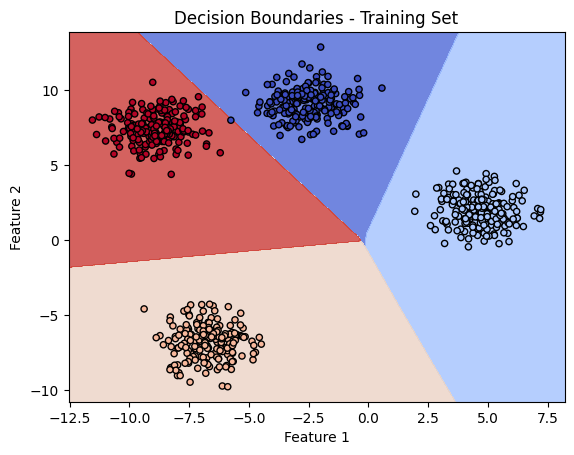

134084/134084 [==============================] - 188s 1ms/step


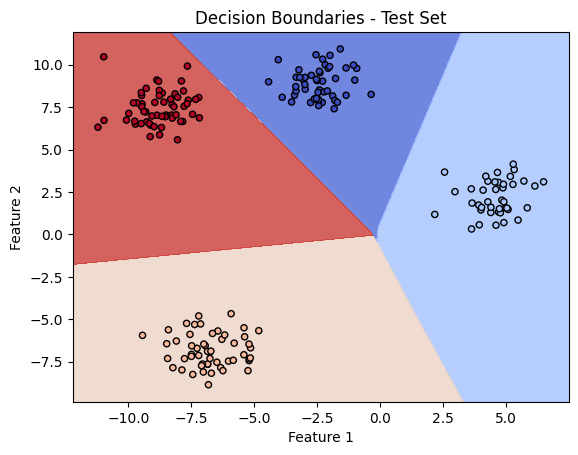

In [ ]:
def plot_decision_boundary(X, y, model, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_train, y_train, model, title='Decision Boundaries - Training Set')

plot_decision_boundary(X_test, y_test, model, title='Decision Boundaries - Test Set')
